# ЛР 3 — Фильтрация изображений

*Зубарева Марина, РИМ-181226*

In [3]:
import numpy as np
from skimage.io import imread, imshow, imsave
from skimage.color import rgb2gray
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
%matplotlib inline

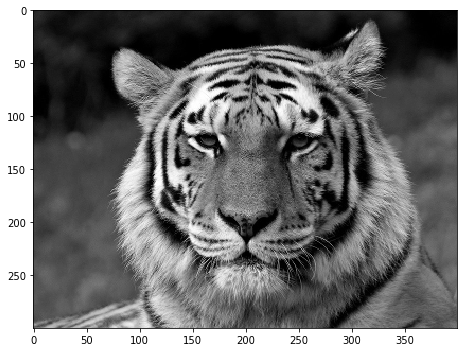

In [14]:
img = imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')
plt.figure(figsize=(10,5))
imshow(img)

In [20]:
def compare_img(img1, img2):
    fig = plt.figure(figsize=(20, 10))
    fig.add_subplot(1, 2, 1)
    imshow(img1)    
    fig.add_subplot(1, 2, 2)
    imshow(img2)    
    plt.show()

### Операция свертки

In [6]:
from scipy.signal import convolve2d

In [9]:
image = np.array([[0, -8, -3, -2], [1, 9, -8, 0], [9, -4, 5, -9], [6, -4, 6, 3]])
kernel = np.array([[4, -5, 4], [-6, -8, -2], [1, 5, 5]])

print(convolve2d(kernel, image, mode='valid'))

[[  7 -88]
 [ 94  -7]]


### Box-фильтр

In [8]:
from skimage.transform import integrate, integral_image

In [12]:
def box_filter(img,k):
    int_img = integral_image(img)*4
    n=img.shape[0]-(k//2)*2
    m=img.shape[1]-(k//2)*2
    result = np.zeros([n,m],np.uint32)
    for i in range(n):
        for j in range (m):
            result[i,j]=integrate(int_img,(i,j),(i+4,j+4))
    result=np.uint8(result//100)
    return result

In [18]:
img_box=box_filter(img,5)

### Сравнение оригинала и изображения с вох-фильторм

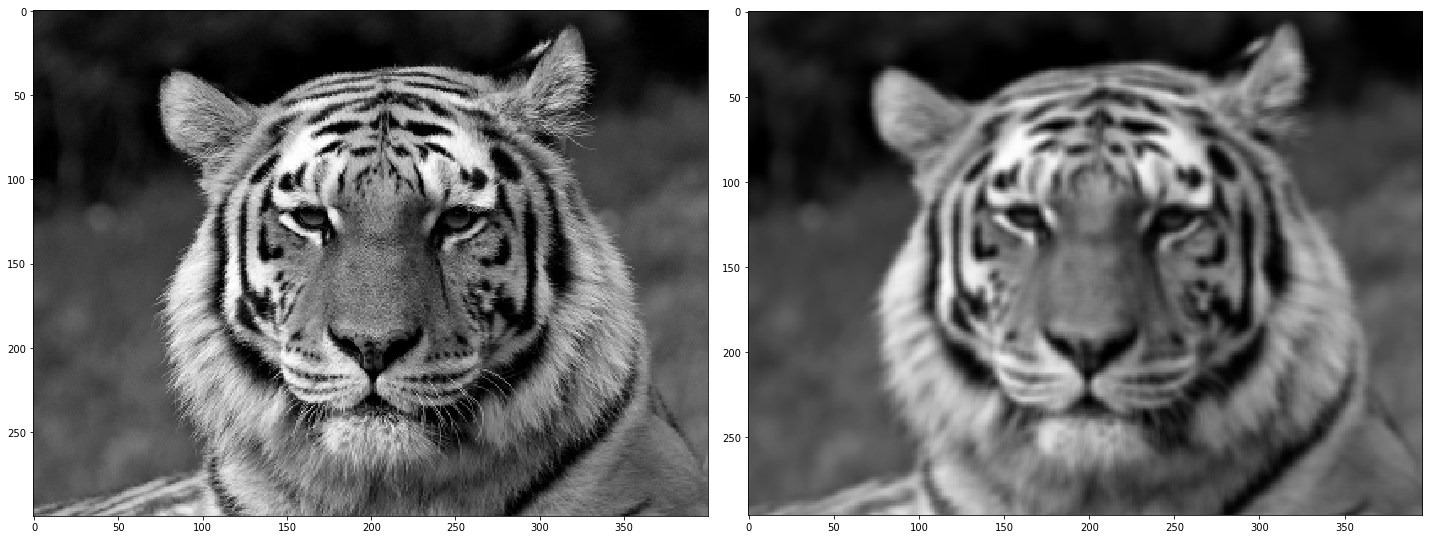

In [22]:
compare_img(img, img_box)

### Сравнение с эталоном

In [16]:
img_box_ref = imread("https://stepik.org/media/attachments/lesson/61037/box-tiger.png")

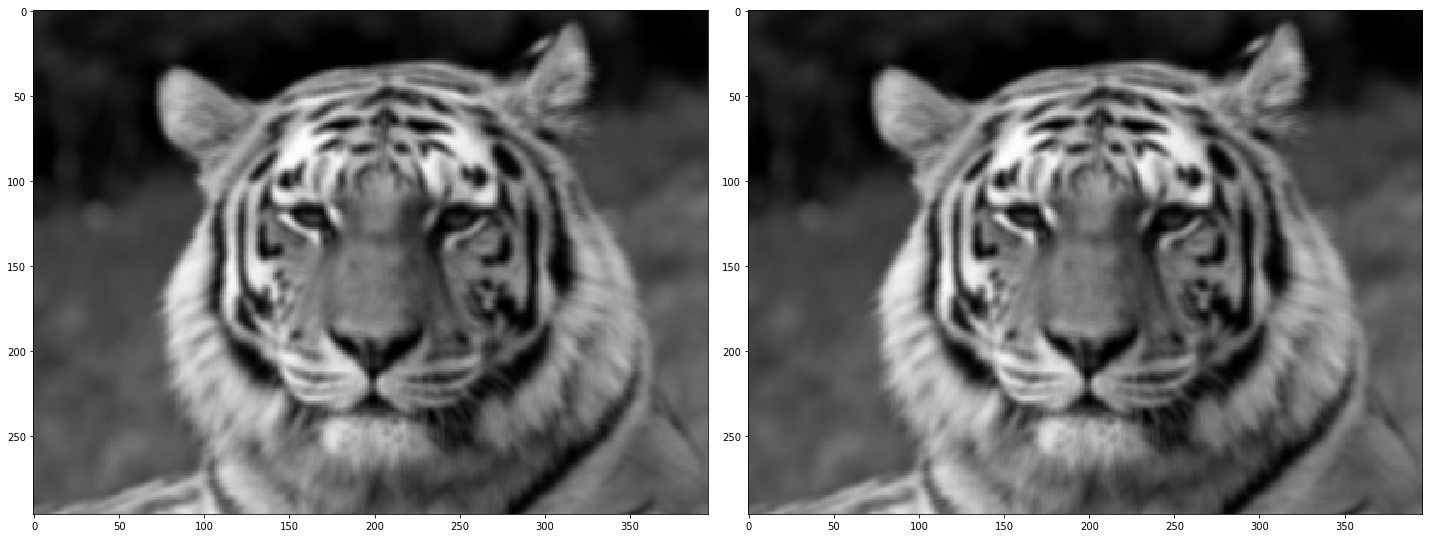

In [21]:
compare_img(img_box, img_box_ref)

In [17]:
np.array_equal(img_box, img_box_ref)

True

## Гауссовский фильтр

### Подсчет функции Гаусса

In [38]:
def gauss(sigma, x, y): 
    return 1/((2*np.pi)*sigma**2)*np.e**((-x**2 - y**2)/(2*sigma**2))
sigma, x, y = [1, 1, 1]
gauss(sigma, x, y)

0.05854983152431917

### Ядро гауссовского фильтра

In [39]:
def gauss_kernel(sigma):
    k = round(3*sigma)
    kernel = [[gauss(sigma, x, y) for x in range(-k, k+1)] for y in range(-k, k+1)]
    kernel = np.array(kernel)
    norm_kernel = kernel / np.sum(kernel, axis=(0,1))
    return norm_kernel

In [40]:
kernel = gauss_kernel(0.33)
print('\n'.join([' '.join(['{:.5f}'.format(item) for item in row]) for row in kernel]))

0.00010 0.00974 0.00010
0.00974 0.96065 0.00974
0.00010 0.00974 0.00010


### Гауссовская фильтрация

In [44]:
def gauss_filter(img, sigma):
    kernel = gauss_kernel(sigma)
    result = np.clip(convolve2d(img/255,kernel,mode='valid'),0,1)
    result = np.floor(result*255).astype('uint8')
    return result

In [45]:
img_gauss = gauss_filter(img, 0.66)

### Сравнение оригинала и изображения с сигма = 0.66

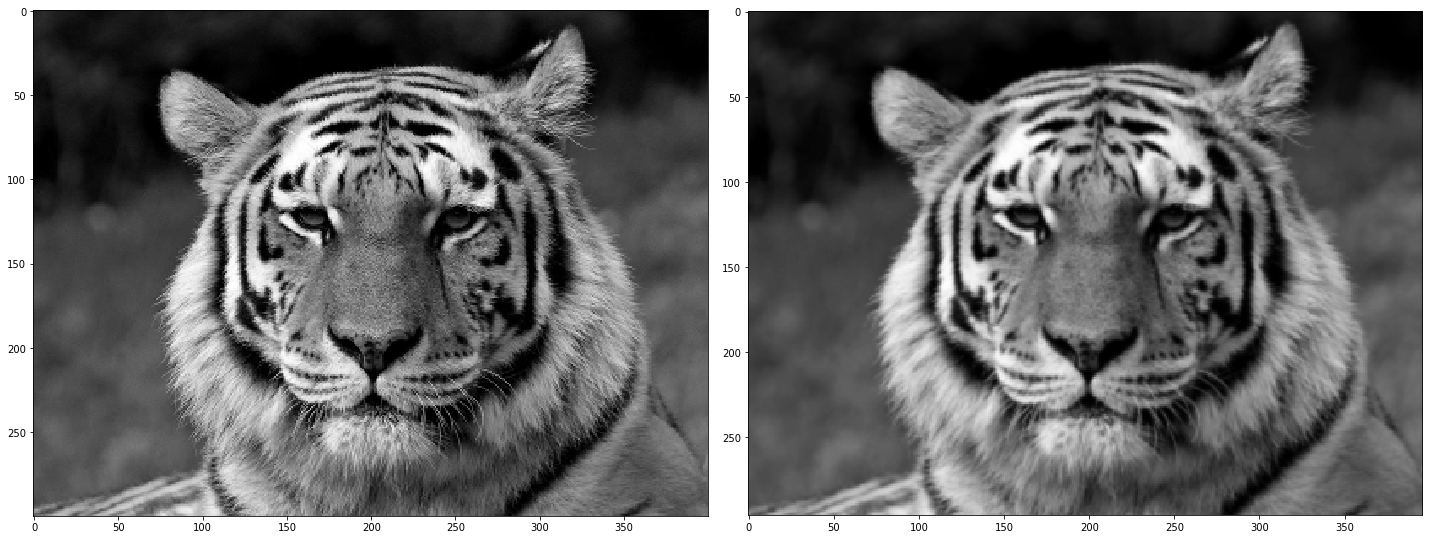

In [49]:
compare_img(img, img_gauss)

### Сравнение с эталоном

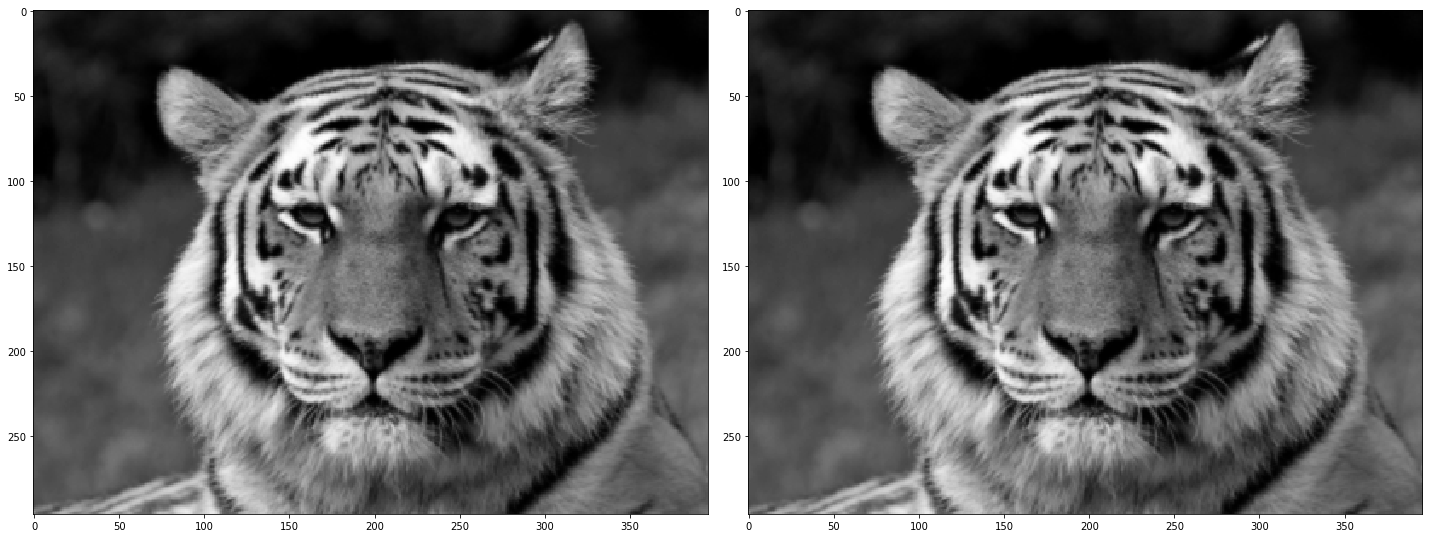

In [50]:
img_gauss_ref = imread('https://stepik.org/media/attachments/lesson/61037/gaussian-tiger.png')
compare_img(img_gauss, img_gauss_ref)

In [51]:
np.array_equal(img_gauss, img_gauss_ref)

True

### Повышение резкости изображения

In [78]:
def sharp_filter(img):
    result = np.array([[[0] * img.shape[1]] * img.shape[0]], dtype='float')[0]
    kernel = np.array([[-1, -2, -1], [-2, 22, -2], [-1, -2, -1]]) / 10
    for i in range(3, img.shape[0] + 1):
        for j in range(3, img.shape[1] + 1):
            result[i - 3, j - 3] = (img[i-3: i, j-3: j] * kernel).sum()
    result = np.clip(result[: - 2, : - 2], 0, 255).astype('uint8')
    return result

In [79]:
img_sharp = sharp_filter(img)

### Сравнение оригинала и изображения с повышенной резкостью

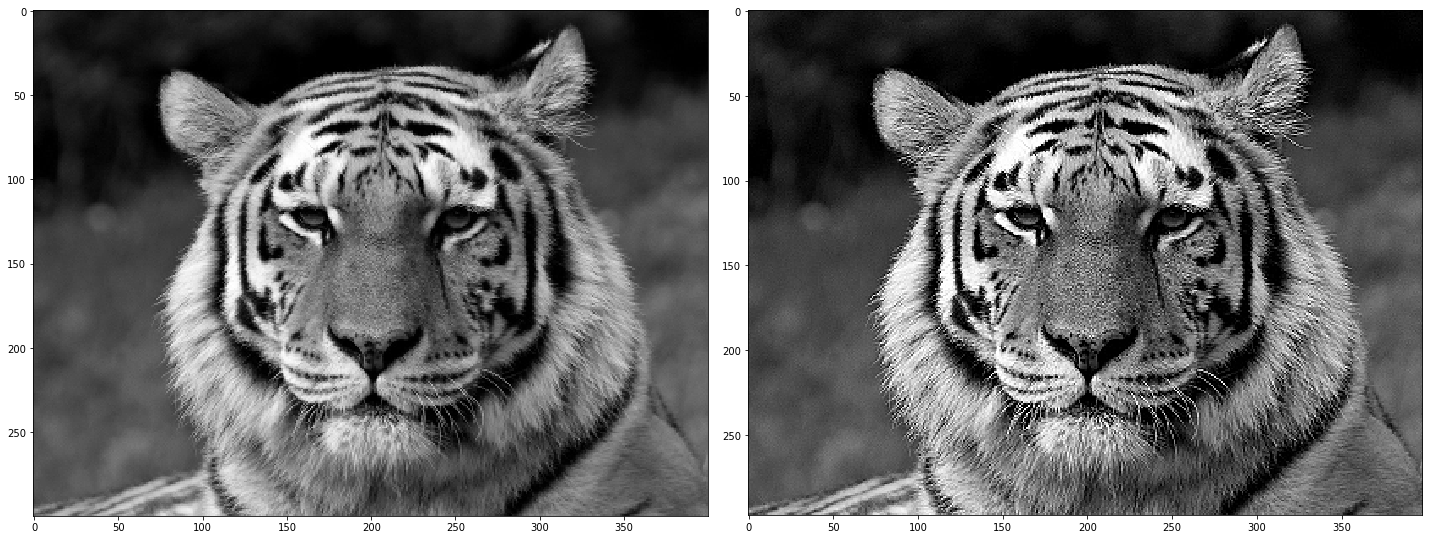

In [80]:
compare_img(img, img_sharp)

### Сравнение с эталоном

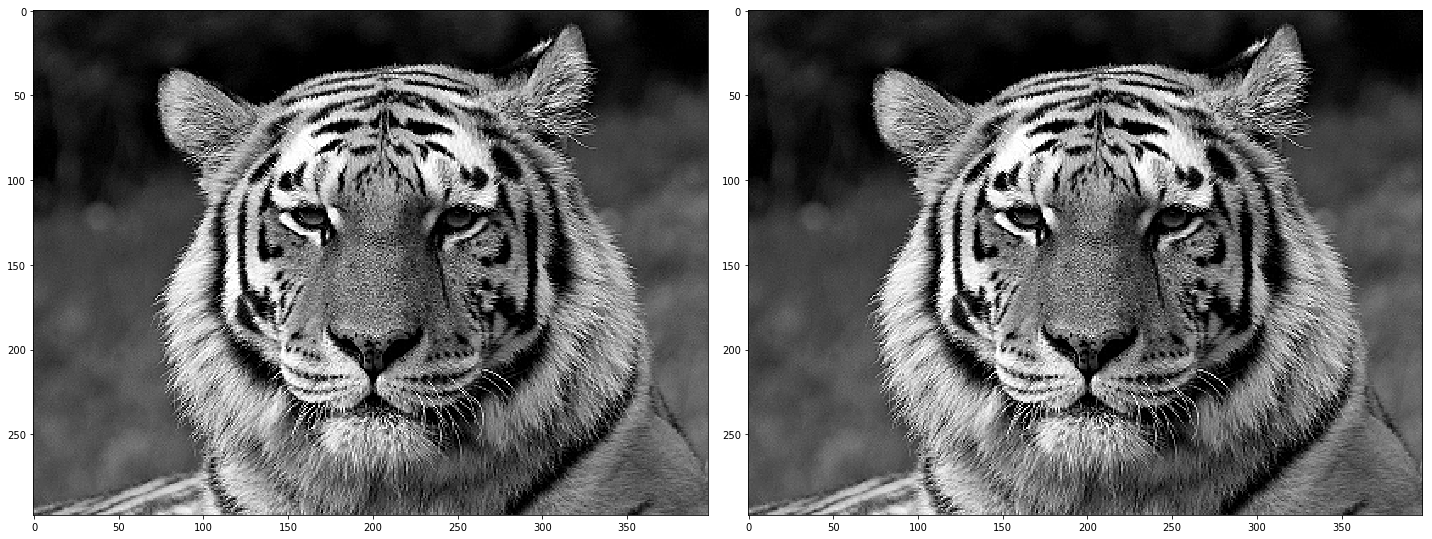

In [81]:
img_sharp_ref = imread('https://stepik.org/media/attachments/lesson/61037/unsharp-tiger.png')
compare_img(img_sharp, img_sharp_ref)

In [74]:
np.array_equal(img_sharp, img_sharp_ref)

True

## Медианный фильтр

In [82]:
def median_filter(img,window):
    n=img.shape[0]-(window//2)*2 
    m=img.shape[1]-(window//2)*2
    result = np.zeros([n,m],np.uint32)
    for i in range(n):
        for j in range (m):
            kernel = img[i:i+window,j:j+window] 
            median = int(np.median(kernel.ravel()))
            result[i][j] = median
    result=np.uint8(result)
    return result

In [83]:
img_median=median_filter(img,7)

### Сравнение оригинала и изображения с использованием медианного фильтра

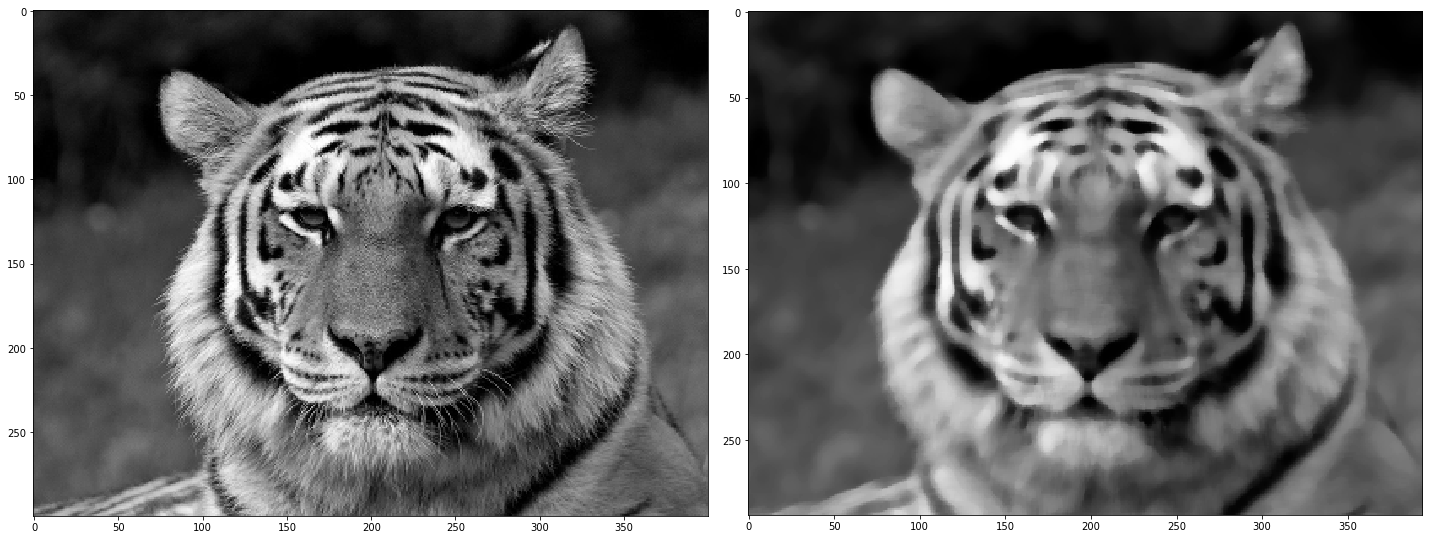

In [84]:
compare_img(img, img_median)

### Сравнение с эталоном

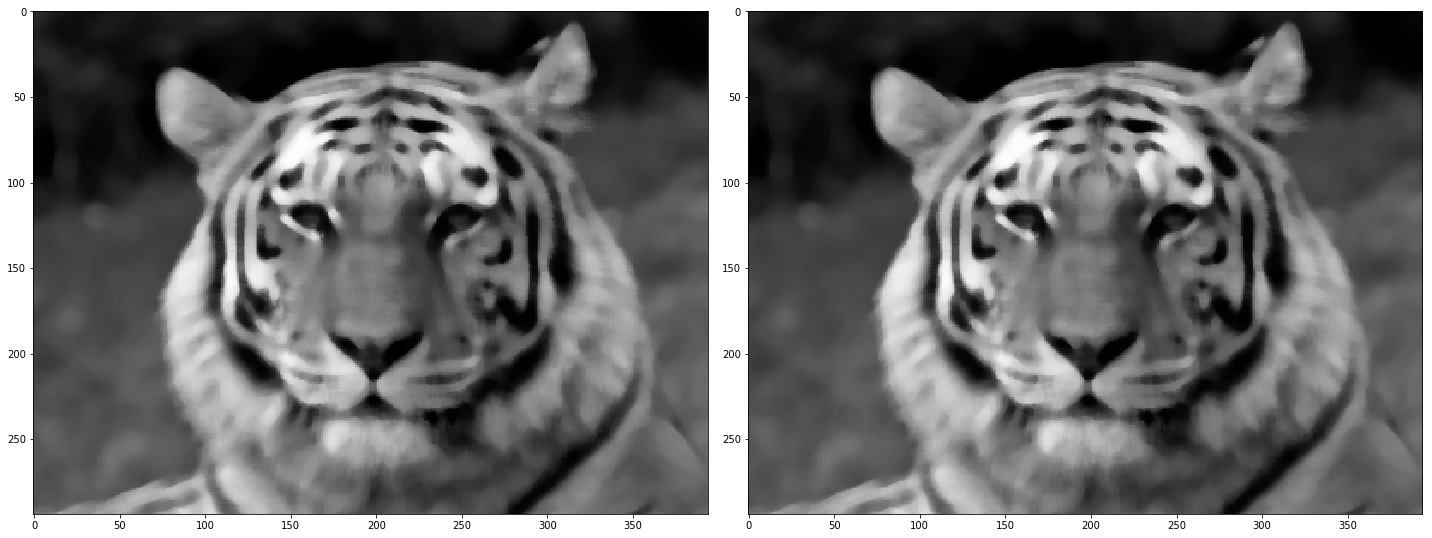

In [87]:
img_median_ref = imread('https://stepik.org/media/attachments/lesson/61041/median-tiger.png')
compare_img(img_median, img_median_ref)

In [88]:
np.array_equal(img_median, img_median_ref)

True